<a href="https://colab.research.google.com/github/yangyeji2020311166/ML/blob/main/TF_IDF_(T_SNE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from future.utils import iteritems
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-17\"

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [748 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [85.2 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bioni

In [ ]:
f=open('/content/스마트폰 크롤링.txt','r',encoding='utf-8')
txt = f.readlines()
f.close()

txt2=[]          #중복 댓글 제거
for item in txt1:
    if item not in txt2:
        txt2.append(item)


print(txt2)

In [ ]:
##대댓글 아이디 삭제하기
remove_id_list=[]
for i in range(len(txt2)):
  if '?@' in txt2[i]:
    cnt = 0
    for j in range(len(txt2[i])):
      if (txt2[i][j] == '?' or txt2[i][j] == ' '):
        if (txt2[i][j] == '?'):
          cnt+=1
      elif cnt>=2:
        break
    tmp = txt2[i].split(sep='?',maxsplit=cnt)
    remove_id_list.append(tmp[cnt])
  else:
    remove_id_list.append(txt2[i])

print(remove_id_list)

In [ ]:
from konlpy.tag import Okt
import konlpy
okt = konlpy.tag.Okt()

for i, document in enumerate(remove_id_list):
    okt = konlpy.tag.Okt()
    clean_words = []
    for word in okt.pos(document, stem=True): #어간 추출
        if word[1] in ['Noun']: #명사
            clean_words.append(word[0])
    print(clean_words) 
    remove_id_list[i] = clean_words
print(remove_id_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
noun_list = []

for i in morphs:
    for word, tag in i:
        if tag in ['Noun']:
            noun_list.append(word)

print(noun_list)

['아이디', '댓글', '내용', '섭', '초기', '불량', '오늘', '교품', '다만', '구입', '신분', '중', '힌지', '체크', '이번', '모두', '때', '딸', '느낌', '그린', '정상', '깔깔', '힉스', '교환', '탈모', '장', '카일', '왜', '자꾸', '플립', '작년', '톰', '브라운', '중국', '스파이', '어차피', '머', '문제', '확인', '것', '범', '앗', '초기', '불량', '작년', '좀', '땅땅', '맨', '불량', '내용', '테스트', '일부', '물', '교품', '궁굼', '교품', '방수', '테스트', '임동현', '은근', '버즈', '스포', '사람', '성이름', '땅땅', '맨', '테스트', '제품', '교품', '듯', '구매', '리뷰', '점', '단점', '바로', '알', '수', '점', '핑크', '퐁', '손결', '프로필', '합격', '동우', '짱', '이분', '한국', '유튜', '버들', '보시', '번역기', '댓글', '분', '말', '좀', '핑크', '퐁', '손결', '나', '동우', '핑크', '퐁', '손결', '핑크', '퐁', '손결', '뎃글', '핑크', '퐁', '손결', '맞춤법', '부터', '잼민', '동우', '워워', '진정', '광고', '발전', '모욕', '은비', '정당화', '일', '하루', '쇼', '제', '채널', '구독', '제로', '투', '은꼴', '영상', '닉뱡', '이태성', '진짜', '디자인', '역대', '듯', '전자제품', '별로', '안', '멍텅구리', '뭐함', '때껄룩', '멍텅구리', '수도', '멍텅구리', '때껄룩', '문장', '이해', '독자', '멍텅구리', '왜', '시비', '멍텅구리', '관심', '사람', '관심', '가지', '이', '왜', '이해', '못하겟', '뭐', '멍텅구리', '생각', '은비', '멍텅구리', '거'

In [ ]:
count = Counter(noun_list)

words = (dict(count.most_common()))
print(words)

{'아이폰': 3303, '폰': 1694, '갤럭시': 1628, '플립': 1545, '기능': 1361, '섭': 1192, '진짜': 1168, '영상': 1096, '때': 1089, '더': 1085, '삼성': 1052, '배터리': 948, '폴드': 925, '리뷰': 885, '저': 878, '사용': 874, '거': 812, '애플': 782, '것': 750, '카메라': 749, '디자인': 747, '미니': 741, '생각': 738, '화면': 737, '성능': 721, '좀': 697, '프로': 692, '발열': 643, '이': 634, '이번': 569, '수': 534, '그냥': 526, '왜': 514, '정도': 500, '사람': 478, '요': 472, '충전': 465, '시리즈': 448, '보고': 422, '형': 420, '때문': 412, '말': 394, '노트': 387, '함': 385, '뭐': 384, '도': 383, '나': 382, '설정': 382, '고민': 380, '앱': 380, '게임': 379, '제': 377, '로': 367, '부분': 365, '비교': 363, '가격': 356, '느낌': 348, '지금': 345, '중': 344, '개': 335, '이제': 334, '안': 333, '전': 326, '그': 324, '기본': 311, '울트라': 309, '구매': 308, '정말': 298, '스마트폰': 296, '문제': 288, '역시': 288, '다른': 285, '를': 274, '한번': 273, '폴': 272, '손': 271, '하나': 271, '인트': 268, '제품': 266, '차이': 265, '모델': 264, '버튼': 263, '걸': 263, '단점': 257, '핸드폰': 255, '임': 254, '자체': 242, '비': 240, '소리': 238, '은': 237, '유저': 237, '듯': 230, 

In [ ]:
counts = Counter(noun_list)

In [ ]:
vocab = sorted(counts, key=counts.get, reverse=True)
print(vocab)

['아이폰', '폰', '갤럭시', '플립', '기능', '섭', '진짜', '영상', '때', '더', '삼성', '배터리', '폴드', '리뷰', '저', '사용', '거', '애플', '것', '카메라', '디자인', '미니', '생각', '화면', '성능', '좀', '프로', '발열', '이', '이번', '수', '그냥', '왜', '정도', '사람', '요', '충전', '시리즈', '보고', '형', '때문', '말', '노트', '함', '뭐', '도', '나', '설정', '고민', '앱', '게임', '제', '로', '부분', '비교', '가격', '느낌', '지금', '중', '개', '이제', '안', '전', '그', '기본', '울트라', '구매', '정말', '스마트폰', '문제', '역시', '다른', '를', '한번', '폴', '손', '하나', '인트', '제품', '차이', '모델', '버튼', '걸', '단점', '핸드폰', '임', '자체', '비', '소리', '은', '유저', '듯', '세대', '디스플레이', '개선', '분', '다음', '페이', '내', '무선', '이유', '사전예약', '점', '방수', '핑크', '유튜브', '돈', '불량', '다시', '후', '확인', '계속', '처음', '가능', '킹', '노치', '무게', '난', '액정', '두목', '그린', '바로', '더블', '기', '사진', '항상', '케이스', '가요', '달', '기기', '개인', '게', '크기', '거의', '출시', '오늘', '모두', '별로', '플래그', '펜', '또', '혹시', '모드', '기술', '폴더', '힌지', '별도', '인식', '최고', '못', '광고', '테스트', '제한', '댓글', '살', '만족', '지원', '용', '조금', '플러스', '요즘', '와이파이', '용량', '예전', '맥스', '가지', '가장', '건', '번', '아이패드', '커버', 

In [ ]:
word2idx = {word.encode("utf8").decode("utf8"): ii for ii, word in enumerate(vocab,1)}

In [ ]:
idx2word = {ii: word for ii, word in enumerate(vocab)}

In [ ]:
V = len(word2idx)
N = len(noun_list)
tf = CountVectorizer()
tf.fit_transform(noun_list)
tf.fit_transform(noun_list)[0:1].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
tfidf = TfidfVectorizer(max_features = 100, max_df=0.95, min_df=0)
A_tfidf_sp = tfidf.fit_transform(noun_list) 

In [ ]:
tfidf_dict = tfidf.get_feature_names()
print(tfidf_dict)

['가격', '가능', '가요', '개선', '개인', '갤럭시', '거의', '게임', '계속', '고민', '구매', '그냥', '그린', '기기', '기능', '기본', '기술', '노치', '노트', '느낌', '다른', '다시', '다음', '단점', '더블', '두목', '디스플레이', '디자인', '때문', '리뷰', '모델', '모두', '모드', '무게', '무선', '문제', '미니', '바로', '발열', '방수', '배터리', '버튼', '별로', '보고', '부분', '불량', '비교', '사람', '사용', '사전예약', '사진', '삼성', '생각', '설정', '성능', '세대', '소리', '스마트폰', '시리즈', '아이폰', '애플', '액정', '역시', '영상', '오늘', '울트라', '유저', '유튜브', '이번', '이유', '이제', '인트', '자체', '정도', '정말', '제품', '지금', '진짜', '차이', '처음', '출시', '충전', '카메라', '케이스', '크기', '페이', '폴더', '폴드', '프로', '플래그', '플립', '핑크', '하나', '한번', '항상', '핸드폰', '혹시', '화면', '확인', '힌지']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
data_array = A_tfidf_sp.toarray()
data = pd.DataFrame(data_array, columns=tfidf_dict)
print(data)

         가격   가능   가요   개선   개인  갤럭시   거의   게임   계속   고민  ...   플립   핑크   하나  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
138088  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
138089  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
138090  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
138091  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
138092  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

         한번   항상  핸드폰   혹시   화면   확인   

In [ ]:
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)

In [ ]:
Z = tsne.fit_transform(data_array.T)
print(Z[0:5])
print('Top words: ',len(Z))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.010s...
[t-SNE] Computed neighbors for 100 samples in 0.132s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 4.466377


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 112.558090
[t-SNE] KL divergence after 2400 iterations: 1.036165
[[178.17319    -43.80338   ]
 [104.78466    -40.90621   ]
 [ -0.65624285 -51.01579   ]
 [147.7302      76.46816   ]
 [ 11.949294    71.00282   ]]
Top words:  100


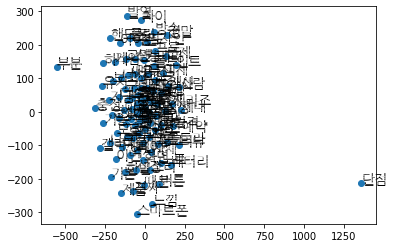

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
fontprop = fm.FontProperties(fname=path, size=14)
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(tfidf_dict)):
    plt.annotate(s=tfidf_dict[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]),fontProperties =fontprop)

plt.draw()

In [ ]:
wordcloud_words = {}
for x in tfidf_dict:
  wordcloud_words[x] = words[x]

print(wordcloud_words)
print(len(wordcloud_words))

{'가격': 356, '가능': 194, '가요': 178, '개선': 227, '개인': 170, '갤럭시': 1628, '거의': 168, '게임': 379, '계속': 197, '고민': 380, '구매': 308, '그냥': 526, '그린': 180, '기기': 171, '기능': 1361, '기본': 311, '기술': 160, '노치': 189, '노트': 387, '느낌': 348, '다른': 285, '다시': 201, '다음': 225, '단점': 257, '더블': 180, '두목': 184, '디스플레이': 229, '디자인': 747, '때문': 412, '리뷰': 885, '모델': 264, '모두': 167, '모드': 162, '무게': 189, '무선': 216, '문제': 288, '미니': 741, '바로': 180, '발열': 643, '방수': 212, '배터리': 948, '버튼': 263, '별로': 167, '보고': 422, '부분': 365, '불량': 202, '비교': 363, '사람': 478, '사용': 874, '사전예약': 214, '사진': 179, '삼성': 1052, '생각': 738, '설정': 382, '성능': 721, '세대': 229, '소리': 238, '스마트폰': 296, '시리즈': 448, '아이폰': 3303, '애플': 782, '액정': 185, '역시': 288, '영상': 1096, '오늘': 167, '울트라': 309, '유저': 237, '유튜브': 205, '이번': 569, '이유': 215, '이제': 334, '인트': 268, '자체': 242, '정도': 500, '정말': 298, '제품': 266, '지금': 345, '진짜': 1168, '차이': 265, '처음': 194, '출시': 168, '충전': 465, '카메라': 749, '케이스': 178, '크기': 169, '페이': 222, '폴더': 157, '폴드': 925, '프로': 692

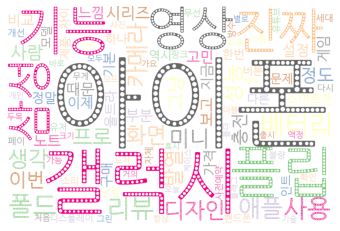

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wordcloud = WordCloud(font_path = font, background_color='white',colormap = "Accent_r", 
                      width=3000, height=2000).generate_from_frequencies(wordcloud_words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()